# DSCI 303 – Project 03
### Nathaniel Atkinson

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
The following section will test a function to generate sequences of simulated daily stock prices, or runs.

In [2]:
def simulate_stock(start,rate,vol,days):
    daily_yeilds = np.random.normal(loc=rate/252, scale=vol/(252**0.5), size = days)
    cumulative_yields = np.cumsum(daily_yeilds)
    daily_multipliers = np.exp(cumulative_yields)
    daily_adds = daily_multipliers*start
    daily_adds = np.insert(daily_adds,0,start,axis=0)
    return(daily_adds)


The following cell with test the function defined above.

<function matplotlib.pyplot.show(close=None, block=None)>

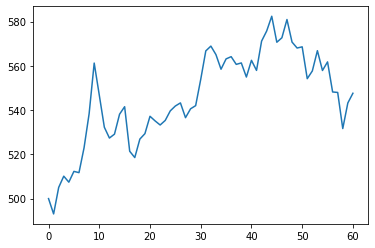

In [3]:
np.random.seed(1)
sim = simulate_stock(500,0.08,0.3,60)
plt.plot(simulate_stock(500,0.08,0.3,60))
plt.show

## Part B: Annual Yield Function
The following section will create and test a function that takes a simulated run as its input, and calculates the annual yield during for that particular run.

In [4]:
def find_yield(run):
    ay = round(math.log(run[0]/run[-1])*(252/(len(run)-1)),4)
    return(ay)

The following section will test the function defined in the above section.

In [5]:
find_yield(sim)

-0.1196

The next section will explore the potential variability in our simulated runs by creating and plotting 25 simulated runs.

<function matplotlib.pyplot.show(close=None, block=None)>

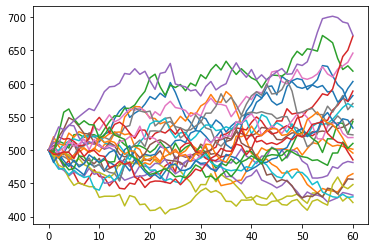

In [6]:
result = []
for i in range(0,25):
    sim = simulate_stock(500,0.08,0.3,60)
    plt.plot(simulate_stock(500,0.08,0.3,60))
    result.append(find_yield(sim))
plt.show

The following section will display the yields for the 25 simulated runs.

In [7]:
print(result)

[-0.8308, -0.201, 0.2457, -0.4468, 0.2111, 0.4554, -0.4726, 1.1023, -0.2671, -1.3819, -0.7093, -0.764, 1.1129, 0.1273, -0.5875, 0.3342, -0.1231, -0.1399, 0.0893, -0.7511, -0.215, 0.0073, 0.1372, 0.462, -1.699]


## Part C: Finding Seeds that Generate Specific Outcomes
The following section will try to find seeds that result in specific outcomes.

In the cell below, Stock A has the highest simulated final price.

A =  196.39136794924877 
B =  87.54185411144834 
C =  106.55259231463434


<function matplotlib.pyplot.show(close=None, block=None)>

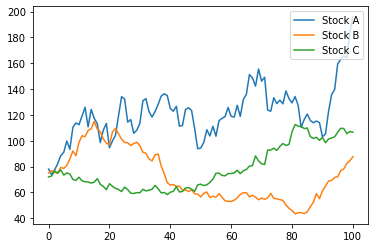

In [8]:
np.random.seed(69696969)
stock_A = simulate_stock(78,0.04,1.2,100)
stock_B = simulate_stock(75,0.08,0.8,100)
stock_C = simulate_stock(72,0.16,0.6,100)

plt.plot(stock_A,label='Stock A')
plt.plot(stock_B,label='Stock B')
plt.plot(stock_C,label='Stock C')
result.append(find_yield(sim))
print('A = ',stock_A[-1],'\nB = ',stock_B[-1],'\nC = ',stock_C[-1])
plt.legend(loc='upper right')
plt.show

In the cell below, Stock B has the highest simulated final price.

A =  37.18160989393508 
B =  88.52397199197632 
C =  80.77564568999463


<function matplotlib.pyplot.show(close=None, block=None)>

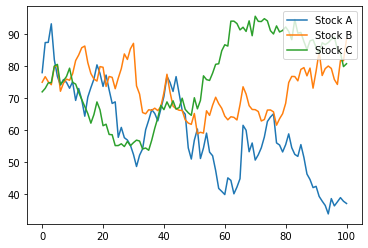

In [9]:
np.random.seed(9568784)
stock_A = simulate_stock(78,0.04,1.2,100)
stock_B = simulate_stock(75,0.08,0.8,100)
stock_C = simulate_stock(72,0.16,0.6,100)

plt.plot(stock_A,label='Stock A')
plt.plot(stock_B,label='Stock B')
plt.plot(stock_C,label='Stock C')
result.append(find_yield(sim))
print('A = ',stock_A[-1],'\nB = ',stock_B[-1],'\nC = ',stock_C[-1])
plt.legend(loc='upper right')
plt.show

In the cell below, Stock C has the highest simulated final price.

A =  67.85517093370822 
B =  66.90033470182746 
C =  165.8047425663879


<function matplotlib.pyplot.show(close=None, block=None)>

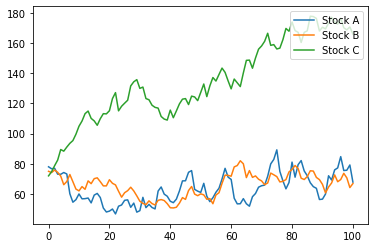

In [10]:
np.random.seed(9586487)
stock_A = simulate_stock(78,0.04,1.2,100)
stock_B = simulate_stock(75,0.08,0.8,100)
stock_C = simulate_stock(72,0.16,0.6,100)

plt.plot(stock_A,label='Stock A')
plt.plot(stock_B,label='Stock B')
plt.plot(stock_C,label='Stock C')
result.append(find_yield(sim))
print('A = ',stock_A[-1],'\nB = ',stock_B[-1],'\nC = ',stock_C[-1])
plt.legend(loc='upper right')
plt.show

## Part D: Monte Carlo Simulation
The following section will perform several simulations to estimate probabilities relating to the outcome of a certain event. (Monte Carlo Simulation)

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    sims = []
    final_prices = []
    annual_yields = []
    for i in range(0,num_runs):
        daily_yeilds = np.random.normal(loc=rate/252, scale=vol/(252**0.5), size = days)
        cumulative_yields = np.cumsum(daily_yeilds)
        daily_multipliers = np.exp(cumulative_yields)
        daily_adds = daily_multipliers*start
        daily_adds = np.insert(daily_adds,0,start,axis=0)
        sims.append(daily_adds)
        final_prices.append(daily_adds[-1])
        annual_yields.append(round(math.log(daily_adds[0]/daily_adds[-1])*(252/(len(daily_adds)-1)),4))
    return(daily_adds,final_prices,annual_yields)


The following section will test the function by running a Monte Carlo simulation with a specific seed.

(array([  0.,   0.,   0.,   0.,  93., 192.,  68.,  84.,  48.,  11.,   5.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550]),
 <BarContainer object of 31 artists>)

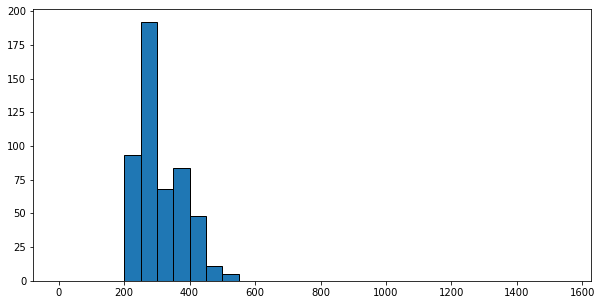

In [12]:
np.random.seed(1)
result, final_prices, annual_yields = monte_carlo(200,0.1,0.4,500,10000)
plt.figure(figsize=[10,5])
plt.hist(result,bins=np.arange(0, 1600, 50),edgecolor='black')

The following section will display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [13]:
np.percentile(final_prices,[10,25,50,75,90])

array([118.04624103, 165.57284663, 242.95069357, 357.56400701,
       505.90949984])

## Part E: Effects of Volatility
The following section will perform multiple monte carlos using different volatilities, but will otherwise use the same parameters.

In [14]:
np.random.seed(1)
stock_A,final_A,annual_A = monte_carlo(100,0.12,0.3,150,10000)
stock_B,final_B,annual_B = monte_carlo(100,0.12,0.7,150,10000)

print('Average Annual Yield for A over 10000 runs: ',round(np.mean(annual_A),4))
print('Average Annual Yield for B over 10000 runs: ',round(np.mean(annual_B),4))

Average Annual Yield for A over 10000 runs:  -0.1218
Average Annual Yield for B over 10000 runs:  -0.1128


The following section will visually inspect the results of the two Monte Carlo simulations by plotting histograms of the final prices.

<function matplotlib.pyplot.show(close=None, block=None)>

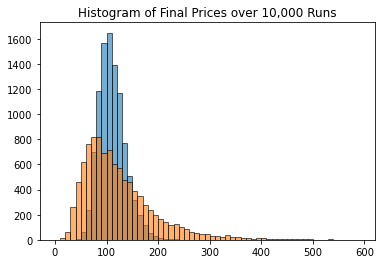

In [15]:
plt.hist(final_A,alpha = 0.6, bins=np.arange(0,600, 10),edgecolor='black')
plt.hist(final_B,alpha = 0.6, bins=np.arange(0,600, 10),edgecolor='black')
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.show

## Part F: Comparing Two Stocks
The following section will use Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with different parameters.

In [16]:
np.random.seed(1)
stock_A,final_A,annual_A = monte_carlo(120,0.08,0.2,252,10000)
stock_B,final_B,annual_B = monte_carlo(120,0.05,0.5,252,10000)
AgB=0
Ag150=0
Bg150=0
As100=0
Bs100=0
for i in range(len(final_A)):
    if final_A[i]>final_B[i]:
        AgB += 1
    if final_A[i] > 150:
        Ag150 += 1
    if final_B[i] > 150:
        Bg150 += 1
    if final_A[i] <100:
        As100 += 1
    if final_B[i] <100:
        Bs100 += 1

print('Proportions of runs in which...\n-------------------------------')
print('A ends above B:\t\t',round(AgB/len(final_A),4))
print('\nA ends above 150:\t',round(Ag150/len(final_A),4))
print('B ends above 150:\t',round(Bg150/len(final_A),4))
print('\nA ends below 100:\t',round(As100/len(final_A),4))
print('B ends below 100:\t',round(Bs100/len(final_A),4))


Proportions of runs in which...
-------------------------------
A ends above B:		 0.5206

A ends above 150:	 0.2338
B ends above 150:	 0.362

A ends below 100:	 0.0951
B ends below 100:	 0.3195


## Part G: Expected Call Payoff
The section will use Monte Carlo to estimatethe expected payoff of a callon a particular stock.

In [17]:
np.random.seed(1)
stock,final,annual = monte_carlo(200,0.11,0.4,225,10000)
final = np.subtract(final,225)
final[final<0]=0
print('The average call payoff over the 10,000 runs is:',round(np.sum(final)/len(final),2))




The average call payoff over the 10,000 runs is: 40.65
